<a href="https://colab.research.google.com/github/gskumlehn/autism-info-llm-comparison/blob/main/levenshtein_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/gskumlehn/autism-info-llm-comparison.git

Cloning into 'autism-info-llm-comparison'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 1.06 MiB | 4.67 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [4]:
!pip install python-Levenshtein
import Levenshtein

In [5]:
import pandas as pd

df = pd.read_csv("autism-info-llm-comparison/data.csv")
df.head()

,Questions,WHO,ChatGPT 4.0,ChatGPT Vision,ScholarGPT,Gemini,Llama3,Bing AI (Copilot),Google Palm,Claude,ReKa Core,Solar Mini
0,What is autism spectrum disorders?,Autism spectrum disorders (ASD) are a diverse ...,Autism Spectrum Disorders (ASD) are a group of...,Autism Spectrum Disorders (ASD) are a group of...,Autism Spectrum Disorders (ASD) are a group of...,Autism spectrum disorder (ASD) is a developmen...,Autism Spectrum Disorders (ASD) is a neurodeve...,Autism Spectrum Disorders (ASD) are a group of...,Autism spectrum disorders (ASD) are a group of...,Autism Spectrum Disorder (ASD) is a complex ne...,Autism Spectrum Disorder (ASD) is a neurodevel...,Autism spectrum disorder (ASD) is a neurodevel...
1,Which are the abilities and need of individual...,The abilities and needs of autistic people var...,Individuals with autism spectrum disorders (AS...,Abilities:\n\nStrong attention to detail and p...,Abilities of Individuals with Autism Spectrum ...,Autism spectrum disorder (ASD) is a developmen...,Individuals with Autism Spectrum Disorders (AS...,Individuals with Autism Spectrum Disorders (AS...,Individuals with autism spectrum disorders (AS...,Individuals with autism spectrum disorders (AS...,Abilities of Individuals with Autism Spectrum ...,Individuals with autism spectrum disorders oft...
2,Which are the co-occurring conditions of autis...,People with autism often have co-occurring con...,Common co-occurring conditions in individuals ...,Common co-occurring conditions with Autism Spe...,Individuals with Autism Spectrum Disorders (AS...,People with autism spectrum disorder (ASD) oft...,Common co-occurring conditions with Autism Spe...,Individuals with Autism Spectrum Disorders (AS...,Individuals with autism spectrum disorders (AS...,Co-occurring conditions frequently associated ...,Individuals with Autism Spectrum Disorders (AS...,Individuals with autism spectrum disorders can...
3,What is the epidemiology of autism spectrum di...,It is estimated that worldwide about 1 in 100 ...,The epidemiology of autism spectrum disorders ...,The epidemiology of Autism Spectrum Disorders ...,The epidemiology of Autism Spectrum Disorders ...,The epidemiology of autism spectrum disorder (...,The epidemiology of Autism Spectrum Disorders ...,What is the epidemiology of autism spectrum di...,The epidemiology of autism spectrum disorders ...,Here's a concise overview of the epidemiology ...,Epidemiology of Autism Spectrum Disorders (ASD...,The epidemiology of autism spectrum disorders ...
4,What are the causes of autism spectrum disorders?,Available scientific evidence suggests that th...,The causes of autism spectrum disorders (ASD) ...,The causes of Autism Spectrum Disorders (ASD) ...,The exact causes of Autism Spectrum Disorders ...,The exact cause of autism spectrum disorder (A...,The exact causes of Autism Spectrum Disorders ...,The exact causes of Autism Spectrum Disorders ...,The exact causes of autism spectrum disorders ...,The causes of autism spectrum disorders (ASD) ...,The causes of Autism Spectrum Disorders (ASD) ...,The exact causes of autism spectrum disorders ...


In [10]:
distances = {}
llms = df.columns[2:]
for llm in llms:
    distances[llm] = []

    for index, row in df.iterrows():
        who_answer = row['WHO']
        llm_answer = row[llm]
        distance = Levenshtein.distance(who_answer, llm_answer)
        distances[llm].append(distance)

distances_df = pd.DataFrame(distances)
print(distances_df)

   ChatGPT 4.0  ChatGPT Vision  ScholarGPT  Gemini  Llama3  Bing AI (Copilot)  \
0          208             236         291     227     212                291   
1          598             465         868     483     489                853   
2          569             393         805    1551     264                807   
3          660             635         943    1196     270                370   
4          633             662        1008     814     628               1571   
5         1104            1115        1382    1834     974               1043   
6         1227            1374        1522     898     954                969   
7         1385            1587        1637     492     335                313   

   Google Palm  Claude  ReKa Core  Solar Mini  
0          267     420        519         245  
1          598     701       1499        1028  
2          400     770       1313         355  
3         1269     929       1807         389  
4          968     799       1

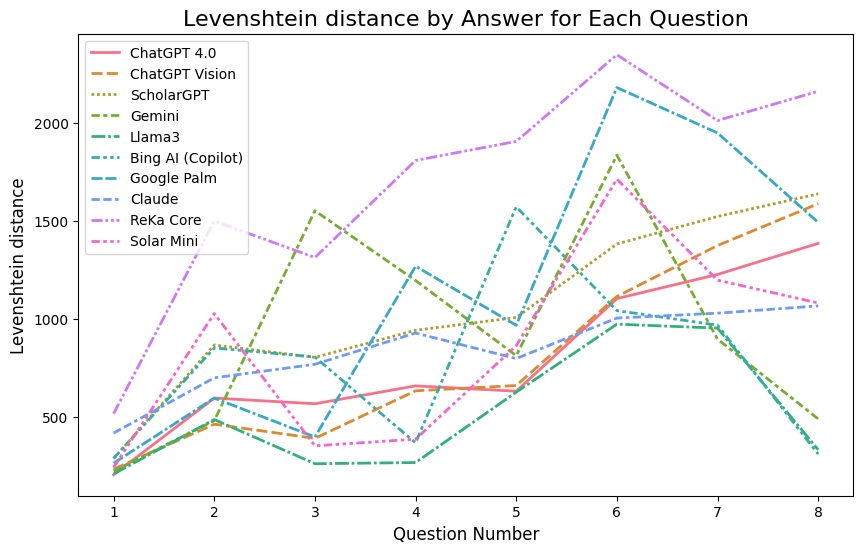

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.set_palette("crest")
sns.lineplot(data=distances_df, linewidth=2)

plt.title("Levenshtein distance by Answer for Each Question", fontsize=16)
plt.xlabel("Question Number", fontsize=12)
plt.ylabel("Levenshtein distance", fontsize=12)
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)])

plt.show()

In [12]:
distances_means = distances_df.mean()
print(distances_means)

ChatGPT 4.0           798.000
ChatGPT Vision        808.375
ScholarGPT           1057.000
Gemini                936.875
Llama3                515.750
Bing AI (Copilot)     777.125
Google Palm          1139.875
Claude                840.125
ReKa Core            1694.500
Solar Mini            859.125
dtype: float64


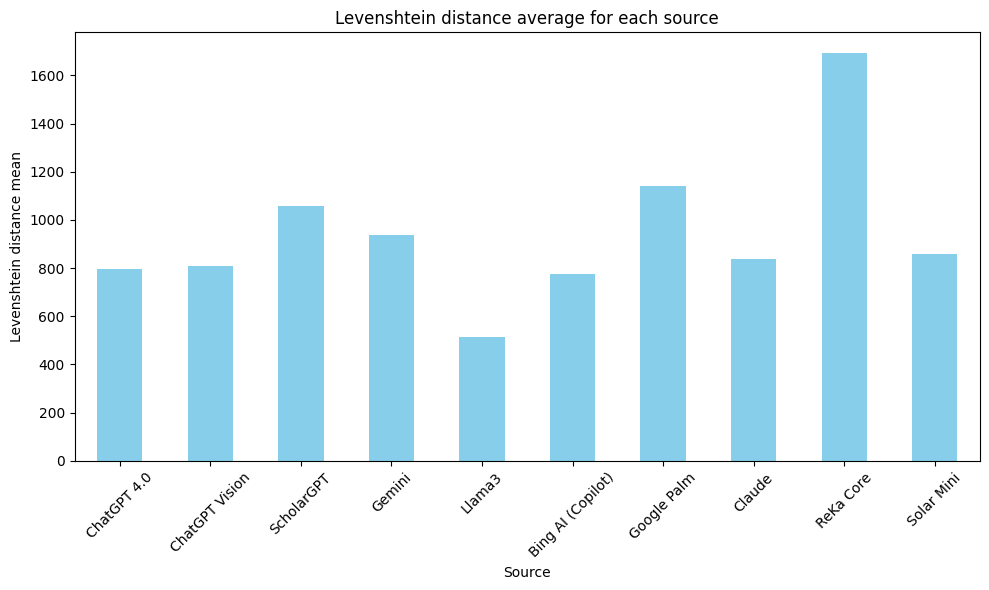

In [13]:
plt.figure(figsize=(10, 6))
distances_means.plot(kind='bar', color='skyblue')
plt.title('Levenshtein distance average for each source')
plt.xlabel('Source')
plt.ylabel('Levenshtein distance mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
distances_question_means = distances_df.mean(axis=1)
print(distances_question_means)

0     291.6
1     758.2
2     722.7
3     846.8
4     985.1
5    1469.2
6    1312.9
7    1154.9
dtype: float64


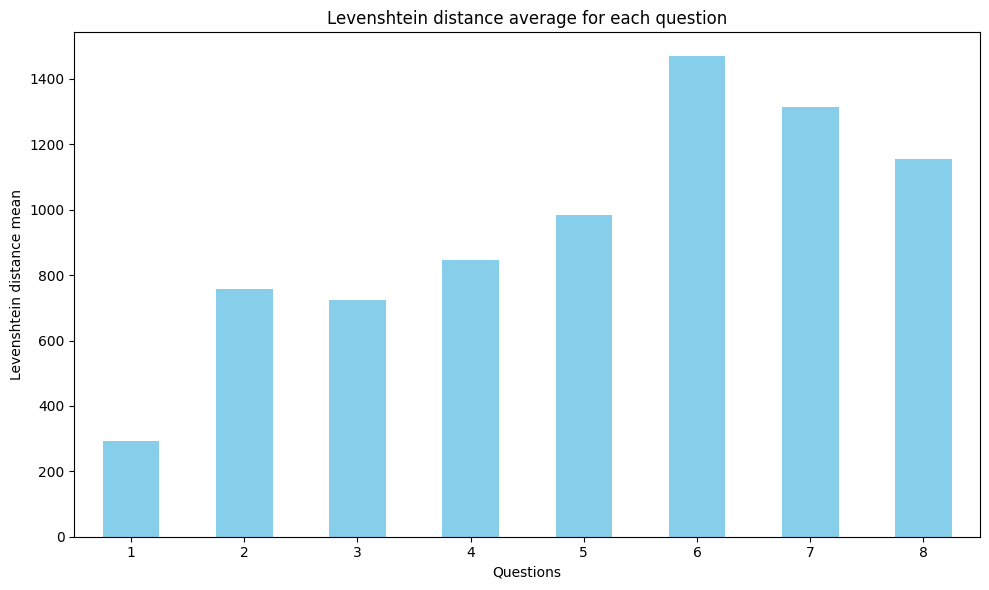

In [15]:
plt.figure(figsize=(10, 6))
distances_question_means.plot(kind='bar', color='skyblue')
plt.title('Levenshtein distance average for each question')
plt.xlabel('Questions')
plt.ylabel('Levenshtein distance mean')
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)], rotation=0)
plt.tight_layout()
plt.show()